In [4]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import statsmodels.stats as stm
import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [16]:
df='/Users/diogopinto/Documents/VScode/greends-avcd/Examples/labour_landuse3.csv'
df2 = pd.read_csv(df)
print(df2)

   NutsID  level_ID                   region_name  year tc_name  tc_area  \
0      11         2                         Norte  2019   Total   151107   
1      15         2                       Algarve  2019   Total    12120   
2      16         2                        Centro  2019   Total   171887   
3      17         2  Área Metropolitana de Lisboa  2019   Total    34812   
4      18         2                      Alentejo  2019   Total   473551   
5      20         2   Região Autónoma dos Açores   2019   Total    42822   
6      30         2   Região Autónoma da Madeira   2019   Total     2085   

  pc_name  pc_area  labour_value  
0   Total   255954        119432  
1   Total    56754         13720  
2   Total   168086         96184  
3   Total    16428          9520  
4   Total   358544         54381  
5   Total     2574         10594  
6   Total     2322         10678  


In [8]:
#perform two-way ANOVA
model = ols('labour_value ~ C(pc_area) + C(tc_area) + C(pc_area):C(tc_area)', data=df2).fit()
sm.stats.anova_lm(model, typ=2)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 54, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 69, but rank is 12
  warnings.warn('covariance of constraints does not have full '
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3726, but rank is 533
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(pc_area),8.066554e+10,54.0,2.858048e+06,4.513907e-26
C(tc_area),2.366960e+03,69.0,6.563222e-02,9.999714e-01
C(pc_area):C(tc_area),1.094332e+05,3726.0,5.619291e-02,1.000000e+00
Residual,4.704000e+03,9.0,NaN,NaN


In [17]:
y=df2["labour_value"] 
x=df2[["pc_area","tc_area"]] 
x=sm.add_constant(x) #addinga a constant(Intercept)
model = sm.OLS(y,x).fit() 
predictions = model.predict(x)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           labour_value   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     7.162
Date:                Thu, 15 Jun 2023   Prob (F-statistic):             0.0477
Time:                        11:33:29   Log-Likelihood:                -79.263
No. Observations:                   7   AIC:                             164.5
Df Residuals:                       4   BIC:                             164.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.368e+04   1.38e+04      0.995      0.3

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [18]:
# import formula api as alias smf 
import statsmodels.formula.api as smf

# formula: response ~ predictor1 + predictor2 + ...
model = smf.ols(formula='labour_value ~ pc_area + tc_area', data=df2).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           labour_value   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     7.162
Date:                Thu, 15 Jun 2023   Prob (F-statistic):             0.0477
Time:                        11:33:39   Log-Likelihood:                -79.263
No. Observations:                   7   AIC:                             164.5
Df Residuals:                       4   BIC:                             164.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.368e+04   1.38e+04      0.995      0.3

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


eval_env: 1
eval_env: 1
eval_env: 1


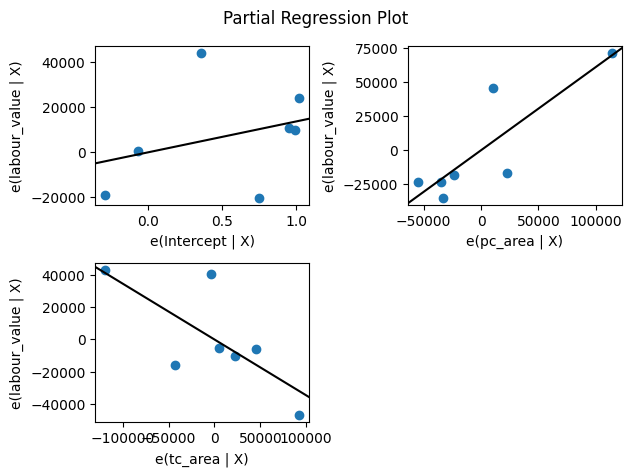

In [19]:
fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.0)

eval_env: 1
eval_env: 1


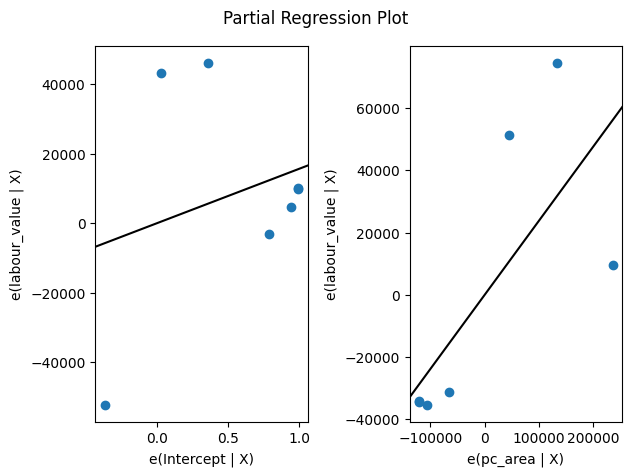

In [20]:
# formula: response ~ predictor
model2 = smf.ols(formula='labour_value ~ pc_area', data=df2).fit()
fig = sm.graphics.plot_partregress_grid(model2)
fig.tight_layout(pad=1.0)

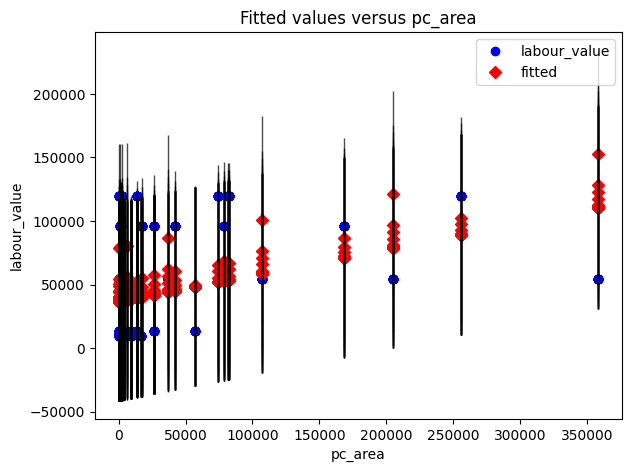

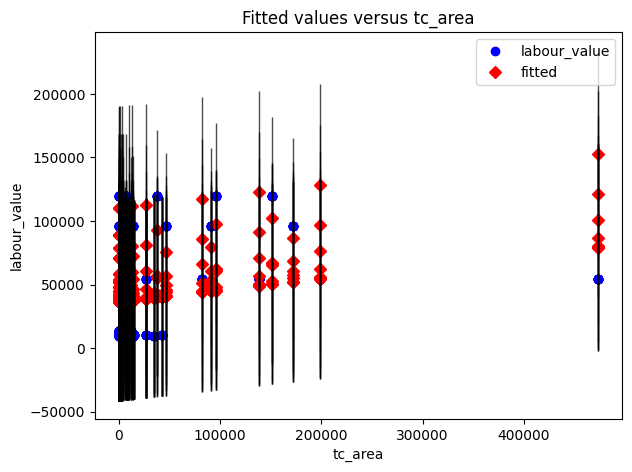

In [14]:
fig = sm.graphics.plot_fit(model, "pc_area")
fig.tight_layout(pad=1.0)

fig = sm.graphics.plot_fit(model, "tc_area")
fig.tight_layout(pad=1.0)



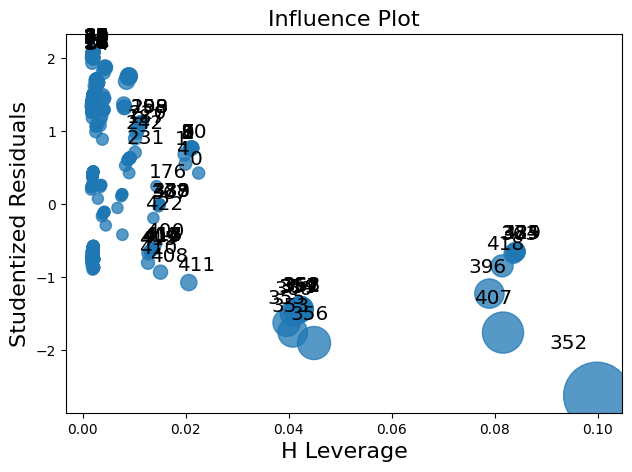

In [15]:
# Diagnostic plots
# Influence plot
fig = sm.graphics.influence_plot(model, criterion="cooks")
fig.tight_layout(pad=1.0)